# 노인 교육

In [1]:
from bs4 import BeautifulSoup 
import urllib
import urllib.request as rq
import pandas as pd

global news_df

def News():
    global news_df
    
    keyword = input('검색 키워드를 입력해주세요 ')
    keyword = urllib.parse.quote(keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    num = int(input('추출할 뉴스기사의 숫자를 입력해주세요 '))
    
    news_df = pd.DataFrame(columns=['title','url']) 
    
    page_num=1
    i=0 #크롤링한 기사의 수
    while num > i:
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+keyword+'&start='+str(page_num)
        html = rq.urlopen(url)
        bs = BeautifulSoup(html,'html.parser') ##html_doc 데이터를 html.parser로 파싱한 뒤 BeautifulSoup 객체를 생성해서 bs 변수에 넣음 
        texts = bs.find_all(class_='news_tit')

        for text in texts:
            news_df.loc[i,'title'] = text.get_text()
            news_df.loc[i,'url'] = text.get('href')
            # news_df.loc[i,'url'] = text['href']
            i +=1
            if i == num:
                break
        page_num +=10
    return news_df

News()

검색 키워드를 입력해주세요  다문화 교육
추출할 뉴스기사의 숫자를 입력해주세요  1000


,title,url
0,2022 연합뉴스 다문화 포럼,https://www.yna.co.kr/view/PYH2022092217960001...
1,"익산시, 아동들에 농촌체험 교육…창의적 인성 키운다",http://www.newsis.com/view/?id=NISX20220924_00...
2,"광명시, 다문화가정과 함께 하는 식생활 교육 운영",http://www.nspna.com/news/?mode=view&newsid=59...
3,"NH농협카드, 다애다문화학교에 카드공익기금 3000만원 전달",https://biz.chosun.com/stock/finance/2022/09/2...
4,동네 이방인 ‘다문화 장애아동’ 도와달라,http://www.ablenews.co.kr/News/NewsContent.asp...
...,...,...
995,"장흥소방서, 응급처지 집중 홍보기간 운영",http://www.m-i.kr/news/articleView.html?idxno=...
996,"대구교육청, 다문화 학생리더 양성 프로그램 운영",http://www.ksmnews.co.kr/default/index_view_pa...
997,"대구시교육청, 다문화 학생리더 양성 ‘나도 롤 모델’ 운영",https://tk.newdaily.co.kr/site/data/html/2022/...
998,충북국제교육원 다문화 교육지원센터 다문화부모자녀캠프 전개,http://www.daejonilbo.com/news/articleView.htm...


In [2]:
noin = news_df.copy()

In [3]:
import re
target = noin['title'].values #Series.values = array
title_list = target.tolist() # array > list
text = ' '.join(title_list) #list들을 공백으로 구분해서 연결
text = re.sub('[^가-힣]+',' ',text) #한글 이외는 공백으로 대체
#text

In [4]:
noin['title'].unique()

array(['2022 연합뉴스 다문화 포럼', '익산시, 아동들에 농촌체험 교육…창의적 인성 키운다',
       '광명시, 다문화가정과 함께 하는 식생활 교육 운영', 'NH농협카드, 다애다문화학교에 카드공익기금 3000만원 전달',
       '동네 이방인 ‘다문화 장애아동’ 도와달라', '"다문화 학생 위한 특별학급 설치토록 초·중등교육법 개정해야"',
       '다음세대와 다문화 교육 [압하지야 우동수 선교사]', '전남교육청, ‘2022 전남학생스포츠문화축제’ 개최',
       '2022년 광명시 다문화가정 식생활 교육 희망자 오는 28일까지 접수',
       "[#나눔동행] '선한 영향력' 교육기부 펼치는 부산대 학생들",
       "[게시판] 서초구가족센터, 내달 7일 다문화가족 대상 '도전 한글왕'",
       "'다문화 청소년 교육 과제는'…연합뉴스 다문화포럼 내일 개막",
       '(주)스노우볼, 27일 글로벌 다문화 인재포럼 개최', '다문화학생들, 산업수도서 기능인 꿈 키워',
       '청주시, 다문화가족 지원위원 위촉식', "계룡시, 올해 '시민대상' 교육·체육·문화부문 등 3명 시상",
       '부산기장소방서, 다문화가정지원센터 대상 응급처치 교육', '손영규 경남정보대 교수 본사 다문화 전문위원 위촉',
       '경남다문화교육박람회, 16~17일 김해문화의전당', '제주교육, 첫 교육행정 질문 실시…양홍식 의원 등',
       '구례교육청, 다문화 어울림 한마당 개최', '전북교육청, 민·관 참여 교육거버넌스위원회 운영',
       '광주시교육청, ‘다문화학생 밀집학교 교장-교육감 간담회’ 실시',
       "서울동부교육지원청, 인공지능으로 다문화학생 '한글 깨치기' 돕는다",
       "시흥교육지원청, '교육장 정담회 및 6개 상임위 정책 수립 나눔회' 실시",
       '"한국어에 자신이 생겨가요"..방과후 한국어 교육 효과', '[교육소식]부산교육청, 부산에듀빅 창의

In [5]:
pd.set_option('display.max_row', 1000)

In [13]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_word = [
'가족',
'가정',
'학생',
'언어',
'문화',
'자녀',
'청소년',
'어울림',
'진로',
'학교',
'아동',
'사업',
'국제',
'사회',
'사업',
'한국어',
'이해',
'직업',
'진학',
'상담',
'소통',
'인식',
'번역',
'정착',
'생활',
'어린이',
'교재',
'예술',
'금융',
'양성',
'교류',
'유아',
'역량',
'한글',
'디지털',
'육성',
'창업',
'차별',
'보육',
'케어',
'배움',
'국어',
'학습',
'취학',
'인재',
'기술',
'미래',
'정보',
'학업',
'환경',
'취업',
'부모',
'능력',
'성공',
'어울림',
'해소',
'안정',
'성장',
'목표',
'재정',
'영어',
'놀이',
'대학생',
'공동체',
'멘토',
'인권',
'존중',
'소비',
'경제',
'쓰기',
'미술',
'취업',
'의사소통',
'공부',
'역사교육',
'심리상담',
'모국어',
'의사소통',
'격차',
'발달',
'강의',
'일본어',
'자녀교육',
'우리말',
'대학생',
'제공',
'교재',
'건강']
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word in stop_word:
            noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기


data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df=pd.DataFrame(series, columns=['cnt'])

df

,cnt
가족,197
가정,164
학생,103
언어,65
문화,60
자녀,50
청소년,49
어울림,45
진로,44
학교,43


In [7]:
df[:1000]

,cnt
다문화,716
교육,376
가족,197
지원,180
가정,164
교육청,147
센터,128
개최,107
학생,103
운영,88


In [140]:
df.index.to_list()

['일자리',
 '소방',
 '안전',
 '치매',
 '건강',
 '사회',
 '디지털',
 '독거',
 '문화',
 '금융',
 '교통',
 '평생교육',
 '역량',
 '인권',
 '양성',
 '인력',
 '소양',
 '키오스크',
 '성교육',
 '여가',
 '스마트폰',
 '예술',
 '의료',
 '공예',
 '회계',
 '정신건강',
 '역사',
 '만들기',
 '환경',
 '재무',
 '농업',
 '보이스피싱',
 '식생활',
 '취업',
 '간호',
 '심리',
 '실생활',
 '포토',
 '미디어',
 '푸드',
 '테크',
 '글로벌',
 '기술',
 '우울증',
 '대화',
 '기초과학',
 '취미',
 '주문',
 '반찬',
 '영화관',
 '힐링',
 '식단',
 '농기',
 '가정',
 '재활',
 '커피',
 '운동',
 '고혈압',
 '당뇨병',
 '지능',
 '말동무',
 '자영업자',
 '휴머니튜드',
 '전문교육',
 '요리',
 '응급처치',
 '말벗',
 '장비',
 '목공',
 '노래',
 '축산물',
 '포장',
 '반려동물',
 '도시농업',
 '학업',
 '가르침',
 '지식',
 '인간관계',
 '치료',
 '식사',
 '농촌',
 '농장',
 '식중독',
 '은퇴',
 '생활고',
 '일터',
 '알바',
 '로봇',
 '외국어',
 '트롯',
 '체육',
 '재배',
 '극단',
 '수영',
 '골프',
 '피아노',
 '상담',
 '플랫폼',
 '소통',
 '예약',
 '도시락',
 '빨래',
 '옥천군',
 '시화',
 '전서',
 '최기문',
 '영천시장',
 '시사회',
 '생수',
 '충북도',
 '게재',
 '교육자',
 '동서',
 '중립',
 '신현원창동',
 '강의',
 '불교',
 '정관',
 '주체',
 '기여',
 '이모저모',
 '대한의사협회',
 '창울',
 '이도영',
 '목포시',
 '차단',
 '이천',
 '부원',
 '방법',
 '부산시',
 '제주시',
 '마산',
 '일자',


In [124]:
df[:500]

,cnt
일자리,120
소방,52
안전,47
치매,46
건강,42
사회,40
디지털,31
독거,29
문화,29
금융,29


In [141]:
df.cnt.unique()

array([120,  52,  47,  46,  42,  40,  31,  29,  27,  24,  23,  22,  17,
        16,  14,  13,  11,  10,   9,   8,   7,   6,   5,   4,   2,   1])

In [113]:
df_test= df[df['cnt'] > 10]  #몇 번 이상 등장한 단어를 뽑아낼 건지 정하기
len(df_test)

21

In [114]:
df_stop_words = df_test
df_stop_words = df_stop_words.reset_index()
df_stop_words

,index,cnt
0,일자리,120
1,소방,52
2,안전,47
3,치매,46
4,건강,42
5,사회,40
6,디지털,31
7,독거,29
8,문화,29
9,금융,29


In [10]:
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='AppleGothic')# 한글 폰트 설정

(-0.5, 2999.5, 3999.5, -0.5)

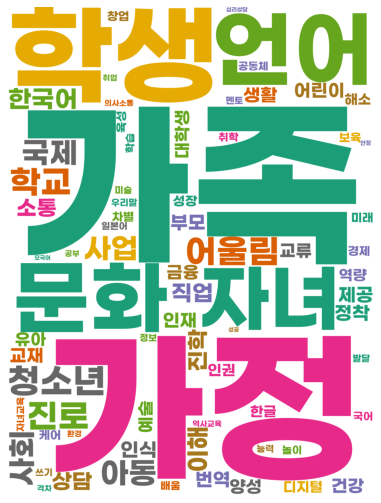

In [14]:
from wordcloud import WordCloud

#generate_from_frequencies 미리 정의된 단어의 빈도수 dict를 이용하여 워드 클라우드를 그림
#  워드 클라우드를 generate할 때 마다 스타일이 미세하게 다르게 형성되는데,random_state 인자를 지정해주면 생성할 때마다 완전히 동일한 결과
wordcloud = WordCloud(font_path='GmarketSansTTFBold.ttf', width= 3000, 
                      height = 4000, random_state=1, background_color='white', 
                      colormap='Dark2', max_words=100).generate_from_frequencies(data)
plt.figure(figsize = (9, 9))
plt.imshow(wordcloud) #이미지 표시
plt.axis('off') #축 지우기